1. The first step in this process is to use Python to clean the data to get it ready for analysis. You must:

    Identify and address any duplicate values
    Ensure all columns match the data types listed in the data dictionary.

    Identify and address any inconsistencies in categorical values (example: cat, Cat, cats)
    
    Identify and address any missing values in this dataset. Fill in missing values with a placeholder appropriate for the data type.

    Identify and address any inappropriate or unusual data points (example: age cannot be 325)

In [ ]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the provided for the exam
import pandas as pd
hotel_data = '/content/drive/MyDrive/Week2_data/Mod_ hotel_bookings - Temp hotel_bookings.csv'
df = pd.read_csv(hotel_data)
df.head()

<ipython-input-144-40944332ebed>:3: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(hotel_data)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# identify duplicate and unique values count
print(df.duplicated().value_counts())

False    87486
True     31909
dtype: int64


In [ ]:

df.duplicated().sum()

31909

In [ ]:
# drop duplicate values in the dataset
df.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119390,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119391,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119392,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119393,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#replace thde duplicate values in the data set
df.drop_duplicates(inplace=True)

In [ ]:
#verify that the duplicates have been replaced
print(df.duplicated().value_counts())

False    87486
dtype: int64


In [ ]:
df.duplicated().sum()

0

In [ ]:
#check the data types in the whole data set
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number           object
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights               object
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**Ensure all columns match the data types listed in the data dictionary.**

In [216]:

# Replace non-digit characters with an empty string
df['arrival_date_week_number'] = df['arrival_date_week_number'].replace(regex=True, to_replace=r'\D', value='')

In [ ]:
# Convert 'arrival_date_week_number' column to numeric data type
df['arrival_date_week_number'] = pd.to_numeric(df['arrival_date_week_number'])

In [ ]:
 #Convert 'arrival_date_week_number' column to string data type, then to integer data type
df['arrival_date_week_number'] = df['arrival_date_week_number'].astype(str).astype(int)
df.arrival_date_week_number.dtypes

dtype('int64')

In [ ]:
df.children.dtypes

dtype('float64')

In [ ]:
df['children'] = df['children'].astype(int)
#df['children']

In [ ]:
# Handle missing values before conversion
df['children'] = df['children'].fillna(0).astype(int)

In [ ]:
df['children'] = df['children'].astype(int)
df.children.dtypes

dtype('int64')

In [ ]:
df.stays_in_week_nights.dtypes

dtype('O')

In [ ]:
df['stays_in_week_nights'] = df['stays_in_week_nights'].replace(regex=True, to_replace=r'\D', value='')

In [ ]:
df['stays_in_week_nights'] = pd.to_numeric(df['stays_in_week_nights'])

In [ ]:
df.stays_in_week_nights.dtypes

dtype('int64')

In [ ]:
#Identify unique values and their counts
for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].value_counts())
    print()

Unique values in column 'hotel':
City Hotel      53428
Resort Hotel    34058
Name: hotel, dtype: int64

Unique values in column 'is_canceled':
0    63459
1    24027
Name: is_canceled, dtype: int64

Unique values in column 'lead_time':
0      5982
1      3217
2      1929
3      1704
4      1570
       ... 
435       1
410       1
709       1
626       1
463       1
Name: lead_time, Length: 479, dtype: int64

Unique values in column 'arrival_date_year':
2016    42443
2017    31696
2015    13346
3091        1
Name: arrival_date_year, dtype: int64

Unique values in column 'arrival_date_month':
August       11260
July         10058
May           8360
April         7917
June          7767
March         7522
October       6966
September     6705
February      6101
December      5133
November      5004
January       4693
Name: arrival_date_month, dtype: int64

Unique values in column 'arrival_date_week_number':
33    2793
34    2491
32    2451
28    2344
30    2335
31    2288
29    2197
27    

In [ ]:
#Identify null values
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             454
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12231
company     

In [ ]:
df['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119390    BEL
119391    FRA
119392    DEU
119393    GBR
119394    DEU
Name: country, Length: 87486, dtype: object

In [ ]:

grouped_df = df.groupby('country').count()

grouped_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
country,,,,,,,,,,,,,,,,,,,,,
ABW,2,2,2,2,2,2,2,2,2,2,...,2,2,0,2,2,2,2,2,2,2
AGO,342,342,342,342,342,342,342,342,342,342,...,342,254,9,342,342,342,342,342,342,342
AIA,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
ALB,11,11,11,11,11,11,11,11,11,11,...,11,10,1,11,11,11,11,11,11,11
AND,7,7,7,7,7,7,7,7,7,7,...,7,7,0,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VGB,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
VNM,8,8,8,8,8,8,8,8,8,8,...,8,8,0,8,8,8,8,8,8,8
ZAF,78,78,78,78,78,78,78,78,78,78,...,78,71,1,78,78,78,78,78,78,78


In [ ]:
#check null value in country column
null_values_sum_column_country = df['country'].isnull().sum()

print("Sum of null values in column 'country':", null_values_sum_column_country)

Sum of null values in column 'country': 454


In [ ]:
#Fill missing values in 'country' column with a placeholder value
placeholder_value = 'Unknown'
df['country'] = df['country'].fillna(placeholder_value)
df['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119390    BEL
119391    FRA
119392    DEU
119393    GBR
119394    DEU
Name: country, Length: 87486, dtype: object

In [ ]:
#confirm that we now have no nulls
null_values_sum_column_country = df['country'].isnull().sum()
print("Sum of null values in column 'country':", null_values_sum_column_country)

Sum of null values in column 'country': 0


In [ ]:
null_values_sum_column_country = df['agent'].isnull().sum()
print("Sum of null values in column 'agent':", null_values_sum_column_country)

Sum of null values in column 'agent': 12231


**convert Agent column**

In [ ]:
df['agent']

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119390    394.0
119391      9.0
119392      9.0
119393     89.0
119394      9.0
Name: agent, Length: 87486, dtype: float64

In [ ]:
df.agent.dtypes

dtype('float64')

In [ ]:
df['agent'] = df['agent'].astype(int)

In [ ]:
# Handle missing values before conversion
df['agent'] = df['agent'].fillna(0).astype(int)

In [ ]:
df['agent'] = df['agent'].astype(int)
df.children.dtypes

dtype('int64')

In [ ]:
#Fill missing values in 'country' column with a placeholder value
#placeholder_value = 'Unknown'
#df['country'] = df['agent'].fillna(placeholder_value)
#df['country']

In [ ]:
null_values_sum_column_country = df['agent'].isnull().sum()
print("Sum of null values in column 'agent':", null_values_sum_column_country)

Sum of null values in column 'agent': 0


In [ ]:
df.company.dtypes

dtype('float64')

In [ ]:
df['company'] = df['company'].astype(int)

In [ ]:
df['company']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119390   NaN
119391   NaN
119392   NaN
119393   NaN
119394   NaN
Name: company, Length: 87486, dtype: float64

In [ ]:
df['company'] = df['company'].fillna(0).astype(int)

In [ ]:
df['company'] = df['company'].astype(int)
df.company.dtypes

dtype('int64')

In [ ]:
df['company']

0         0
1         0
2         0
3         0
4         0
         ..
119390    0
119391    0
119392    0
119393    0
119394    0
Name: company, Length: 87486, dtype: int64

In [ ]:
# test filter from country with zero(0) values
filtered_row = df[~(df['company'] == 0)]
filtered_row

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
19,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,No Deposit,0,110,0,Transient,107.42,0,0,Check-Out,2015-07-02
221,Resort Hotel,1,1,2015,July,28,8,0,1,2,...,No Deposit,0,110,0,Transient,104.72,0,1,Canceled,2015-07-08
223,Resort Hotel,0,1,2015,July,28,8,0,2,2,...,No Deposit,0,110,0,Transient,104.72,1,1,Check-Out,2015-07-10
298,Resort Hotel,0,84,2015,July,28,11,1,1,2,...,No Deposit,0,113,0,Transient,100.00,1,0,Check-Out,2015-07-13
390,Resort Hotel,0,1,2015,July,29,14,0,1,1,...,No Deposit,0,270,0,Transient,134.00,0,0,Check-Out,2015-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119122,City Hotel,0,39,2017,August,35,28,1,1,1,...,No Deposit,0,451,0,Transient,95.00,0,0,Check-Out,2017-08-30
119123,City Hotel,0,1,2017,August,35,29,0,1,1,...,No Deposit,0,451,0,Transient,95.00,0,0,Check-Out,2017-08-30
119124,City Hotel,0,40,2017,August,35,29,0,1,1,...,No Deposit,0,451,0,Transient,95.00,0,0,Check-Out,2017-08-30
119129,City Hotel,0,0,2017,August,35,29,0,1,1,...,No Deposit,0,72,0,Transient,0.00,0,2,Check-Out,2017-08-30


**Identify and address any inconsistencies in categorical values**

In [ ]:
#categorise arrival_date_year to check if there is an out-ranged  booking year
df['arrival_date_year'] = pd.Categorical(df['arrival_date_year'])
df['arrival_date_year']

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
119390    2017
119391    2017
119392    2017
119393    2017
119394    2017
Name: arrival_date_year, Length: 87486, dtype: category
Categories (4, int64): [2015, 2016, 2017, 3091]

<Axes: ylabel='arrival_date_year'>

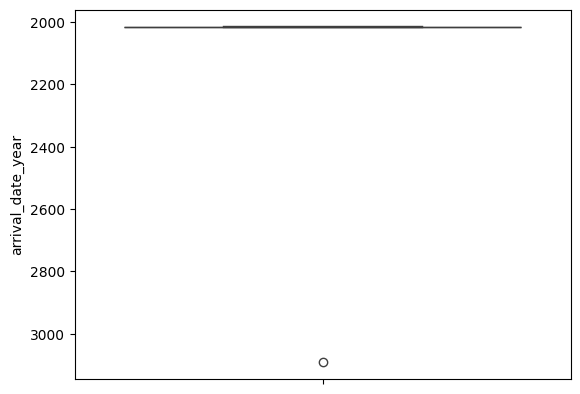

In [ ]:
import seaborn as sns
sns.boxplot(y=df['arrival_date_year'])
#using the boxplot helps us to easily see and outlier in the year column

In [ ]:
df['arrival_date_year'] = pd.Categorical(df['arrival_date_year'])
df['arrival_date_year']

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
119390    2017
119391    2017
119392    2017
119393    2017
119394    2017
Name: arrival_date_year, Length: 87486, dtype: category
Categories (1, int64): [2017]

In [ ]:
# Replace the value with the placeholder value
value_to_replace = 3091
placeholder_value = 2014

df['arrival_date_year'] = df['arrival_date_year'].replace(value_to_replace, placeholder_value)

df['arrival_date_year']






0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
119390    2017
119391    2017
119392    2017
119393    2017
119394    2017
Name: arrival_date_year, Length: 87486, dtype: int64

In [ ]:
#check and confirm the replaced outlier
filtered_row = df[(df['arrival_date_year'] == 2014)]
filtered_row

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2014,July,27,1,0,3,2,...,No Deposit,240,0,0,Transient,82.0,0,1,Canceled,2015-05-06


In [ ]:
#check distinct years in the replaced column to confirm  that there no other outlier
distinct_values_unique = df['arrival_date_year'].unique()
distinct_values_unique


array([2015, 2014, 2016, 2017])

2.The next step is to complete an exploration of the data using Python. This should include:

    Two different types of univariate visualizations. Each visualization
    must include a brief interpretation within the code file.
    Two different types of multivariate visualizations. Each visualization must include a brief interpretation within the code file.

<Axes: xlabel='count', ylabel='market_segment'>

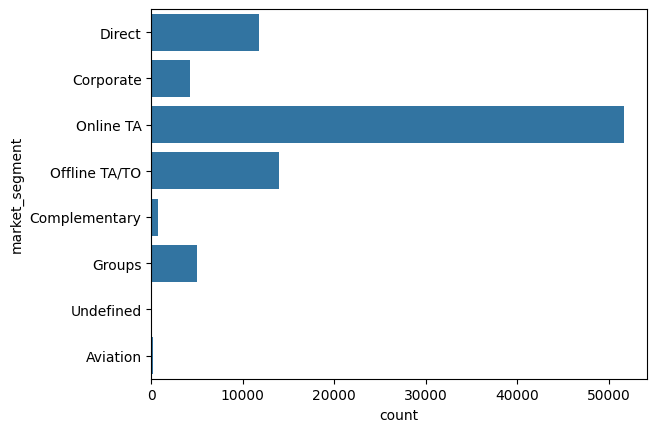

In [ ]:
import seaborn as sns
sns.countplot(df['market_segment'])
# the plot below shows that online TA is the highest performance market segment

<Axes: ylabel='distribution_channel'>

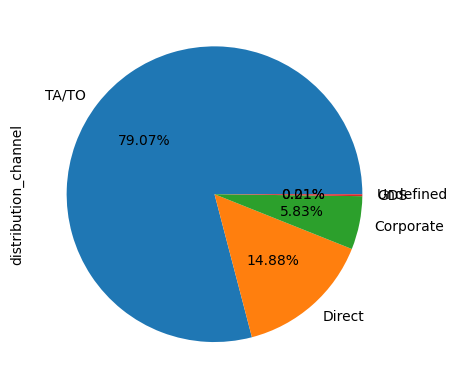

In [ ]:
df['distribution_channel'].value_counts().plot(kind="pie",autopct="%1.1f%%")
#the below pie reflects that TA/TO channel is the highest performing channel

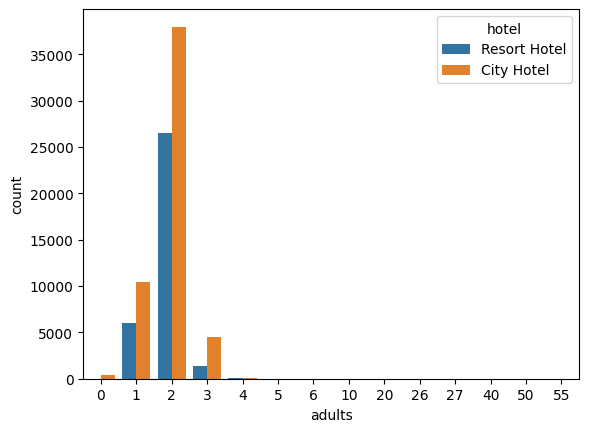

In [214]:
ax = sns.countplot(data=df, x='adults', hue='hotel')

#Looking at the below bar graph shows that City Hotel receives a high number of adults than Resort Hotel

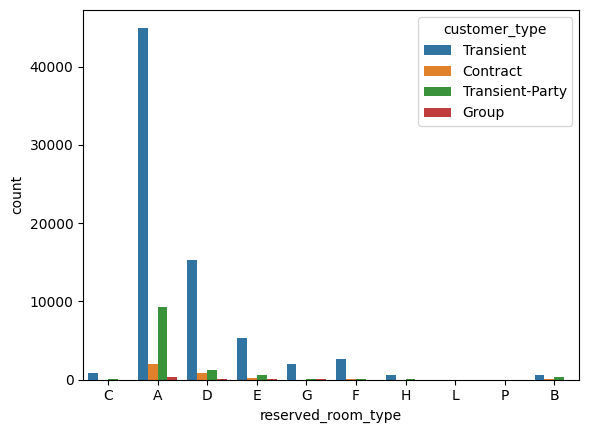

In [215]:
ax = sns.countplot(data=df, x='reserved_room_type', hue='customer_type')
# Looking the below plot, it reflected that most of transient customers always book Reserved room "A" types